<strong> INTRODUCTION.

Customer Churn - the natural business cycle of losing and acquiring customers. Every company, no matter the quality of their product experience customer churn. <br>Churn rate - is the percentage of subscribers who cancel their subscriptions to a service during a specific time period.For a company to achieve profits, its rate of acquiring new customers must be greater than its turnover rate.

<strong> BUSINESS UNDERSTANDING

Syriatel is a Syrian mobile network provider founded in the year 2000, with its headquarters located in Damascus. The organisation has noted that a number of clients that discontinue their subscriptions with the company after a period of time and want to pinpoint the reason why and what to do to improve. The project's goal is to anticipate if a customer will soon stop doing business with Syrialtel telecommunications company based on the company historical data provided, allowing them to identify areas where they may need to improve in order to retain customers and attract new clients.

<strong> DATA UNDERSTANDING

Dataset Description:

The dataset comprises the following features:

1.State: The state in which the customer resides (categorical).

2.Account Length: Number of days the customer has been with SyriaTel (numerical).

3.Area Code: Three-digit area code of the customer's phone number (categorical).

4.Phone Number: Unique identifier for each customer (string).

5.International Plan: Whether the customer has an international calling plan (binary: "yes" or "no").

6.Voice Mail Plan: Whether the customer has a voicemail plan (binary: "yes" or "no").

7.Number Vmail Messages: Number of voicemail messages received by the customer (numerical).

8.Total Day Minutes: Total minutes of daytime calls (numerical).

9.Total Day Calls: Total number of daytime calls made by the customer (numerical).

10.Total Day Charge: Total charges for daytime calls (numerical).

11.Total Eve Minutes: Total minutes of evening calls (numerical).

12.Total Eve Calls: Total number of evening calls made by the customer (numerical).

13.Total Eve Charge: Total charges for evening calls (numerical).

14.Total Night Minutes: Total minutes of nighttime calls (numerical).

15.Total Night Calls: Total number of nighttime calls made by the customer (numerical).

16.Total Night Charge: Total charges for nighttime calls (numerical).

17.Total Intl Minutes: Total minutes of international calls (numerical).

18.Total Intl Calls: Total number of international calls made by the customer (numerical).

19.Total Intl Charge: Total charges for international calls (numerical).

20.Customer Service Calls: Number of customer service calls made by the customer (numerical).

21.Churn: Target variable indicating whether the customer churned ("True" or "False").

<strong> PROBLEM STATEMENT

SyriaTel faces high loses due to current high customer churn rate. The primary challenge is the lack of an effective method to predict customer churn so as to prevent it before it happens thus reducing churn rate and customer satisfaction. The company aims to leverage on its historical data and machine learning techniques to develop a predictive model that predicts customer churn ahead of time.

<strong> OBJECTIVES

MAIN OBJECTIVE.

To come up with a classification machine learning model that accurately predicts customer churn for SyriaTel

SPECIFIC OBJECTIVES

i) Identify the key factors that lead to customer churn

ii) Come up with a a good model to predict customer churn

iii) Give recommendations on how to retain customers based on the information collected.

In [1]:
#load all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Dataset today.csv')
df.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

In [3]:
df.tail()

state  account length  area code phone number international plan  \
3328    AZ             192        415     414-4276                 no   
3329    WV              68        415     370-3271                 no   
3330    RI              28        510     328-8230                 no   
3331    CT             184        510     364-6381                yes   
3332    TN              74        415     400-4344                 no   

     voice mail plan  number vmail messages  total day minutes  \
3328             yes                     36              156.2   
3329              no                      0              231.1   
3330              no                      0              180.8   
3331              no                      0              213.8   
3332             yes                     25              234.4   

      total day calls  total day charge  ...  total eve calls  \
3328               77             26.55  ...              126   
3329               57             39.29  ...               55   
3330              109             30.74  ...               58   
3331              105             36.35  ...               84   
3332              113             39.85  ...               82   

      total eve charge  total night minutes  total night calls  \
3328             18.32                279.1                 83   
3329             13.04                191.3                123   
3330             24.55                191.9                 91   
3331             13.57                139.2                137   
3332             22.60                241.4                 77   

      total night charge  total intl minutes  total intl calls  \
3328               12.56                 9.9                 6   
3329                8.61                 9.6                 4   
3330                8.64                14.1                 6   
3331                6.26                 5.0                10   
3332               10.86                13.7                 4   

      total intl charge  customer service calls  churn  
3328               2.67                       2  False  
3329               2.59                       3  False  
3330               3.81                       2  False  
3331               1.35                       2  False  
3332               3.70                       0  False  

[5 rows x 21 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

The dataset has 3333 rows and 21 columns. The dataset has no missing values. Phone number should be an integer but is unnecessary so will drop it. I would also drop state, area code columns as they are unnecessary. Capitalize column headings, check for whitespaces and hyphenate the column names.

In [5]:
df.describe()

account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       total eve charge  total night minutes  total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       total night charge  total intl minutes  total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       total intl charge  customer service calls  
count        3333.000000             3333.000000  
mean            2.764581                1.562856  
std             0.753773                1.315491  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.780000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

There might be outliers in the area code and number of voicemail messages which are totally possible in real life so i wouldn't drop them.

Data Cleaning

In [6]:
#lets make a copy of the dataset.
df.copy()

state  account length  area code phone number international plan  \
0       KS             128        415     382-4657                 no   
1       OH             107        415     371-7191                 no   
2       NJ             137        415     358-1921                 no   
3       OH              84        408     375-9999                yes   
4       OK              75        415     330-6626                yes   
...    ...             ...        ...          ...                ...   
3328    AZ             192        415     414-4276                 no   
3329    WV              68        415     370-3271                 no   
3330    RI              28        510     328-8230                 no   
3331    CT             184        510     364-6381                yes   
3332    TN              74        415     400-4344                 no   

     voice mail plan  number vmail messages  total day minutes  \
0                yes                     25              265.1   
1                yes                     26              161.6   
2                 no                      0              243.4   
3                 no                      0              299.4   
4                 no                      0              166.7   
...              ...                    ...                ...   
3328             yes                     36              156.2   
3329              no                      0              231.1   
3330              no                      0              180.8   
3331              no                      0              213.8   
3332             yes                     25              234.4   

      total day calls  total day charge  ...  total eve calls  \
0                 110             45.07  ...               99   
1                 123             27.47  ...              103   
2                 114             41.38  ...              110   
3                  71             50.90  ...               88   
4                 113             28.34  ...              122   
...               ...               ...  ...              ...   
3328               77             26.55  ...              126   
3329               57             39.29  ...               55   
3330              109             30.74  ...               58   
3331              105             36.35  ...               84   
3332              113             39.85  ...               82   

      total eve charge  total night minutes  total night calls  \
0                16.78                244.7                 91   
1                16.62                254.4                103   
2                10.30                162.6                104   
3                 5.26                196.9                 89   
4                12.61                186.9                121   
...                ...                  ...                ...   
3328             18.32                279.1                 83   
3329             13.04                191.3                123   
3330             24.55                191.9                 91   
3331             13.57                139.2                137   
3332             22.60                241.4                 77   

      total night charge  total intl minutes  total intl calls  \
0                  11.01                10.0                 3   
1                  11.45                13.7                 3   
2                   7.32                12.2                 5   
3                   8.86                 6.6                 7   
4                   8.41                10.1                 3   
...                  ...                 ...               ...   
3328               12.56                 9.9                 6   
3329                8.61                 9.6                 4   
3330                8.64                14.1                 6   
3331                6.26                 5.0                10   
3332               10.86           

In [7]:
# 1. Checking for missing values.
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

The dataset has no missing values

In [8]:
# 2. Dropping unnecessary columns
#unnecessary columns are state, area code and phone number.
df.drop(columns = ['state', 'phone number', 'area code'], inplace = True)
df.shape

(3333, 18)

The columns have reduced to 18 from 21

In [9]:
# 3. Checking for duplicates.
df.duplicated().sum()

0

There are no duplicates

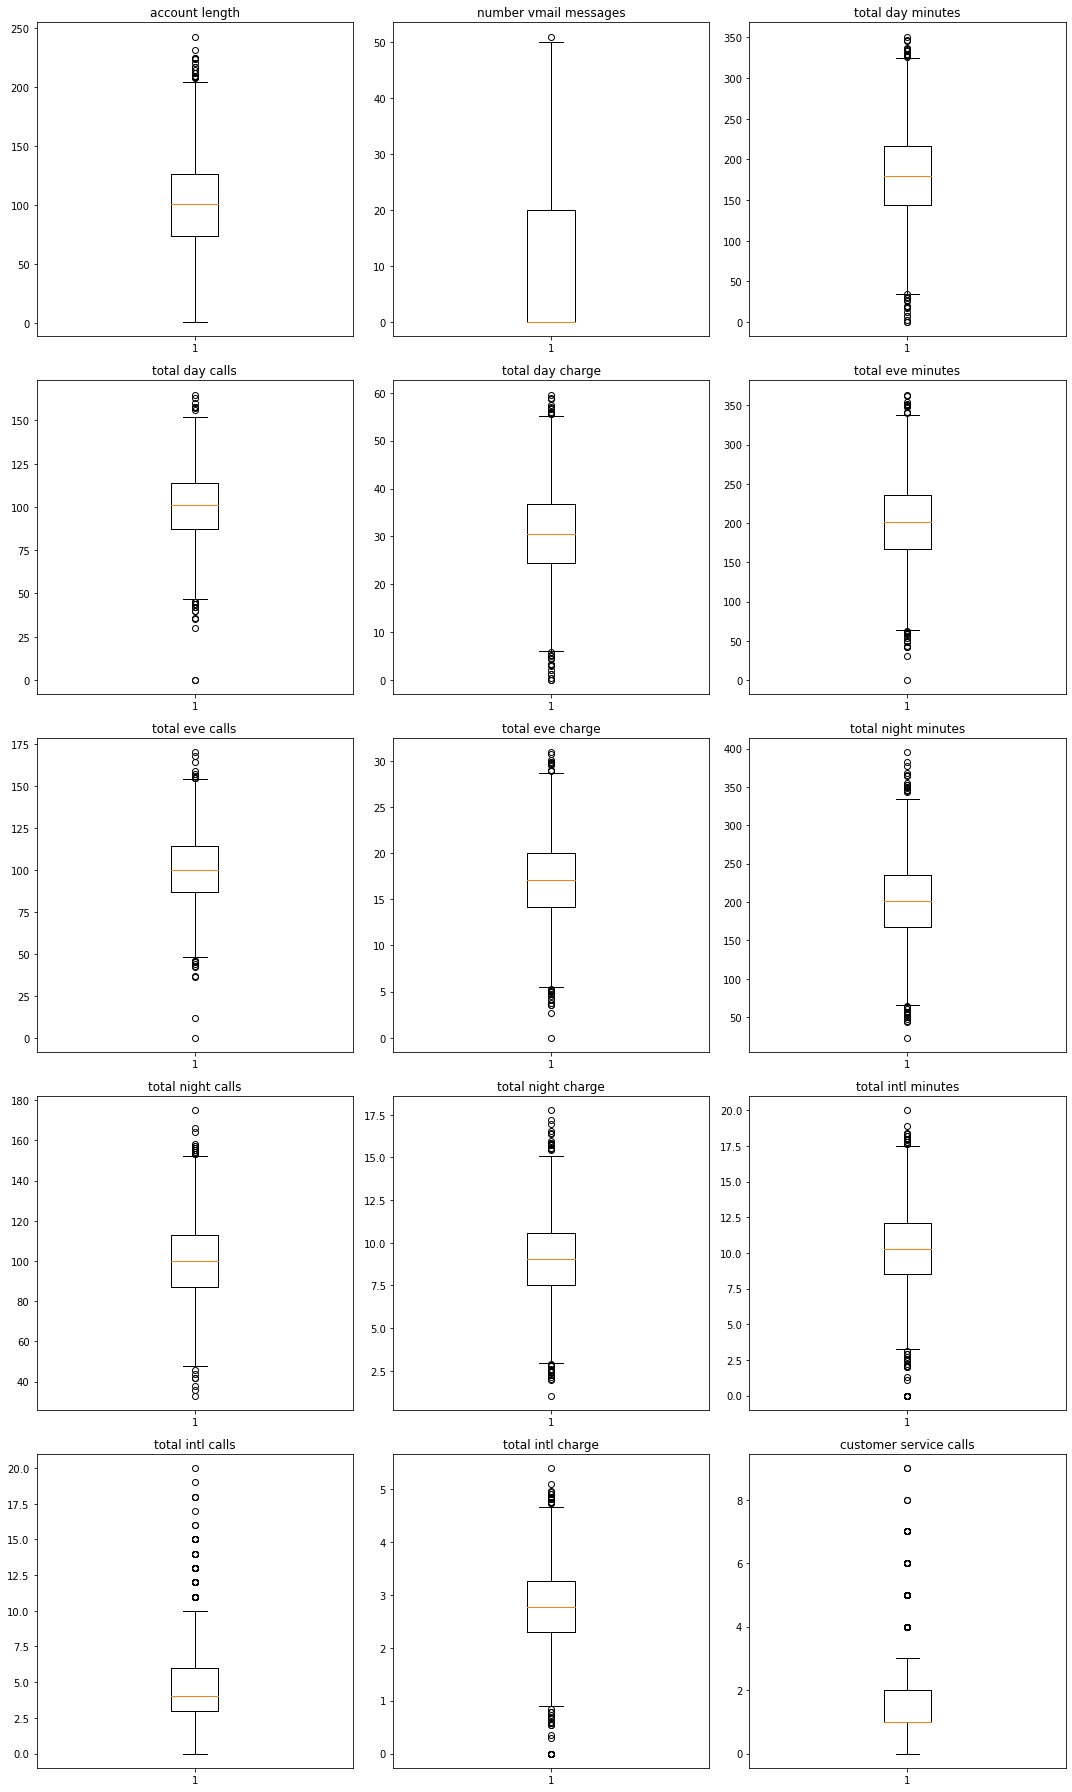

In [10]:
# 4. Checking for outliers
numeric_columns = df.select_dtypes(include=['float64', 'int64', 'int32'])

# Plot box plots for each numeric column
num_cols = len(numeric_columns.columns)
cols_per_row = 3
num_rows = (num_cols - 1) // cols_per_row + 1

plt.figure(figsize=(15, 5 * num_rows))
for i, col in enumerate(numeric_columns.columns):
    plt.subplot(num_rows, cols_per_row, i + 1)
    plt.boxplot(numeric_columns[col])
    plt.title(col)

plt.tight_layout()
plt.show()


Any of these are plausible, thus will not be removing any outliers

In [11]:
# 5. Feature Engineering.
# i)checking for white spaces.
[col.strip() for col in df.columns]

['account length',
 'international plan',
 'voice mail plan',
 'number vmail messages',
 'total day minutes',
 'total day calls',
 'total day charge',
 'total eve minutes',
 'total eve calls',
 'total eve charge',
 'total night minutes',
 'total night calls',
 'total night charge',
 'total intl minutes',
 'total intl calls',
 'total intl charge',
 'customer service calls',
 'churn']

In [12]:
#  ii)Capitalize Column headings.
df.columns = df.columns.str.capitalize()
df

Account length International plan Voice mail plan  \
0                128                 no             yes   
1                107                 no             yes   
2                137                 no              no   
3                 84                yes              no   
4                 75                yes              no   
...              ...                ...             ...   
3328             192                 no             yes   
3329              68                 no              no   
3330              28                 no              no   
3331             184                yes              no   
3332              74                 no             yes   

      Number vmail messages  Total day minutes  Total day calls  \
0                        25              265.1              110   
1                        26              161.6              123   
2                         0              243.4              114   
3                         0              299.4               71   
4                         0              166.7              113   
...                     ...                ...              ...   
3328                     36              156.2               77   
3329                      0              231.1               57   
3330                      0              180.8              109   
3331                      0              213.8              105   
3332                     25              234.4              113   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0                45.07              197.4               99             16.78   
1                27.47              195.5              103             16.62   
2                41.38              121.2              110             10.30   
3                50.90               61.9               88              5.26   
4                28.34              148.3              122             12.61   
...                ...                ...              ...               ...   
3328             26.55              215.5              126             18.32   
3329             39.29              153.4               55             13.04   
3330             30.74              288.8               58             24.55   
3331             36.35              159.6               84             13.57   
3332             39.85              265.9               82             22.60   

      Total night minutes  Total night calls  Total night charge  \
0                   244.7                 91               11.01   
1                   254.4                103               11.45   
2                   162.6                104                7.32   
3                   196.9                 89                8.86   
4                   186.9                121                8.41   
...                   ...                ...                 ...   
3328                279.1                 83               12.56   
3329                191.3                123                8.61   
3330                191.9                 91                8.64   
3331                139.2                137                6.26   
3332                241.4                 77               10.86   

      Total intl minutes  Total intl calls  Total intl charge  \
0                   10.0                 3               2.70   
1                   13.7                 3               3.70   
2                   12.2                 5               3.29   
3                    6.6                 7               1.78   
4                   10.1                 3               2.73   
...                  ...               ...                ...   
3328                 9.9                 6               2.67   
3329                 9.6                 4               2.59   
3330                14.1                 6               3.81   
3331                 5.0                10               1.35   

In [14]:
# iii) Rename columns by adding underscores to spaces
df.rename(columns={col: col.replace(' ', '_') for col in df.columns}, inplace=True)
df.head()

Account_length International_plan Voice_mail_plan  Number_vmail_messages  \
0             128                 no             yes                     25   
1             107                 no             yes                     26   
2             137                 no              no                      0   
3              84                yes              no                      0   
4              75                yes              no                      0   

   Total_day_minutes  Total_day_calls  Total_day_charge  Total_eve_minutes  \
0              265.1              110             45.07              197.4   
1              161.6              123             27.47              195.5   
2              243.4              114             41.38              121.2   
3              299.4               71             50.90               61.9   
4              166.7              113             28.34              148.3   

   Total_eve_calls  Total_eve_charge  Total_night_minutes  Total_night_calls  \
0               99             16.78                244.7                 91   
1              103             16.62                254.4                103   
2              110             10.30                162.6                104   
3               88              5.26                196.9                 89   
4              122             12.61                186.9                121   

   Total_night_charge  Total_intl_minutes  Total_intl_calls  \
0               11.01                10.0                 3   
1               11.45                13.7                 3   
2                7.32                12.2                 5   
3                8.86                 6.6                 7   
4                8.41                10.1                 3   

   Total_intl_charge  Customer_service_calls  Churn  
0               2.70                       1  False  
1               3.70                       1  False  
2               3.29                       0  False  
3               1.78                       2  False  
4               2.73                       3  False

In [15]:
#come up with a column that has the total monthly and yearly charges per customer inoder to review their charges
# Number of days in a month and a year
days_in_month = 30  # Assuming 30 days in a month
days_in_year = 365  # Assuming 365 days in a year

# Calculate total monthly charge and total yearly charge
df['Total_monthly_charge'] = df['Total_day_charge'] * days_in_month
df['Total_yearly_charge'] = df['Total_day_charge'] * days_in_year

In [16]:
df.head()

Account_length International_plan Voice_mail_plan  Number_vmail_messages  \
0             128                 no             yes                     25   
1             107                 no             yes                     26   
2             137                 no              no                      0   
3              84                yes              no                      0   
4              75                yes              no                      0   

   Total_day_minutes  Total_day_calls  Total_day_charge  Total_eve_minutes  \
0              265.1              110             45.07              197.4   
1              161.6              123             27.47              195.5   
2              243.4              114             41.38              121.2   
3              299.4               71             50.90               61.9   
4              166.7              113             28.34              148.3   

   Total_eve_calls  Total_eve_charge  Total_night_minutes  Total_night_calls  \
0               99             16.78                244.7                 91   
1              103             16.62                254.4                103   
2              110             10.30                162.6                104   
3               88              5.26                196.9                 89   
4              122             12.61                186.9                121   

   Total_night_charge  Total_intl_minutes  Total_intl_calls  \
0               11.01                10.0                 3   
1               11.45                13.7                 3   
2                7.32                12.2                 5   
3                8.86                 6.6                 7   
4                8.41                10.1                 3   

   Total_intl_charge  Customer_service_calls  Churn  Total_monthly_charge  \
0               2.70                       1  False                1352.1   
1               3.70                       1  False                 824.1   
2               3.29                       0  False                1241.4   
3               1.78                       2  False                1527.0   
4               2.73                       3  False                 850.2   

   Total_yearly_charge  
0             16450.55  
1             10026.55  
2             15103.70  
3             18578.50  
4             10344.10

<strong> EXPLORATORY DATA ANALYSIS

i) Univariate Analysis.

i) What percentage of customers end up leaving?

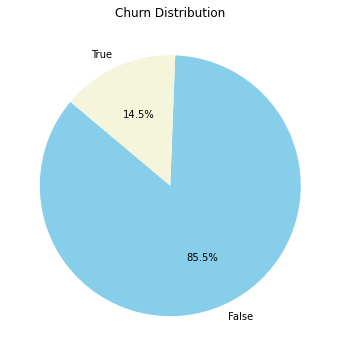

In [17]:
# Calculate counts for each category in the 'Churn' column
churn_rate = df['Churn'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(6, 6))
plt.pie(churn_rate, labels=churn_rate.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'beige'])
plt.title('Churn Distribution')
plt.show()

About 14.5% of SyrialTel customers decide to cancel their subscription with the company.

ii) How many people are on the International plan?

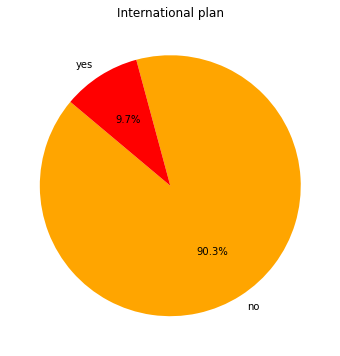

In [18]:
#how many people are on the international plan
int_plan = df['International_plan'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(6, 6))
plt.pie(int_plan, labels=int_plan.index, autopct='%1.1f%%', startangle=140, colors=['orange', 'red'])
plt.title('International plan')
plt.show()

Most customers do not go for the international plan. <br>An analysis of the international plan against churn could give us an analysis of how good the plan is.

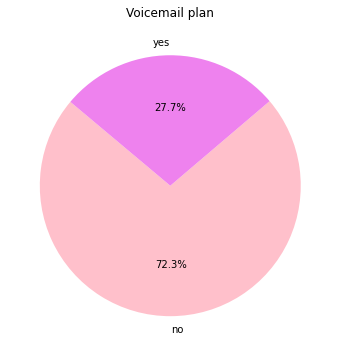

In [18]:
#how many people are in the voice mail plan
vm_plan = df['Voice_mail_plan'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(6, 6))
plt.pie(vm_plan, labels=vm_plan.index, autopct='%1.1f%%', startangle=140, colors=['pink', 'violet'])
plt.title('Voicemail plan')
plt.show()

About 72.3% of people don't go for the voicemail plan.

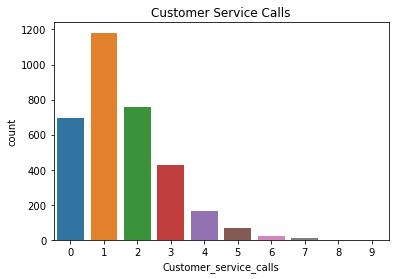

In [20]:
sns.countplot(x = df['Customer_service_calls']);
plt.title('Customer Service Calls');

The number of calls keep decreasing, but 7 calls to customer care is alarming, lets look into that.

2. BiVariate Analysis

i) Does an increase in Customer service call lead to a higher churn rate? 

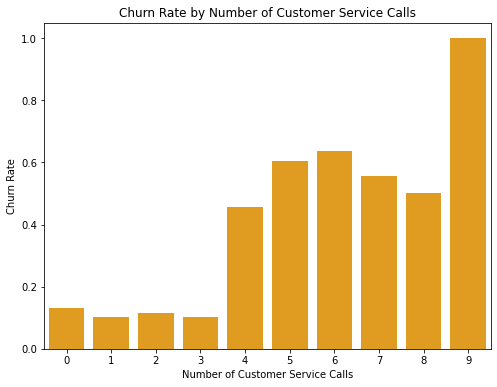

In [21]:
# Calculate churn rate by customer service calls
churn_rate = df.groupby('Customer_service_calls')['Churn'].mean().reset_index()

# Plotting using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(data=churn_rate, x='Customer_service_calls', y='Churn', color='orange')
plt.title('Churn Rate by Number of Customer Service Calls')
plt.xlabel('Number of Customer Service Calls')
plt.ylabel('Churn Rate')
plt.show()

Yes. An increase in number of customer service calls generally leads to an increase in churn rate. The company should address any concerns raised by a customer during this calls immediately. In addition, the company can also look into making sure that the customer service department knows how to handle customers professionally. 

ii) How many people on the international plan end up leaving?

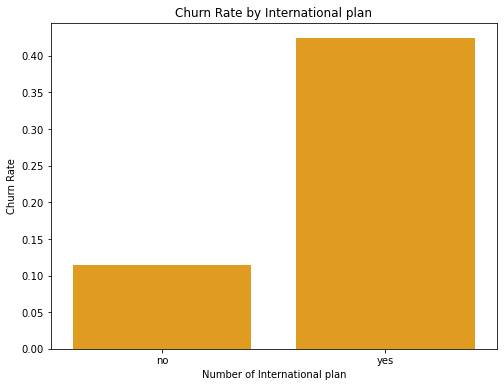

In [21]:
int_churn = df.groupby('International_plan')['Churn'].mean().reset_index()

# Plotting using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(data=int_churn, x='International_plan', y='Churn', color='orange')
plt.title('Churn Rate by International plan')
plt.xlabel('Number of International plan')
plt.ylabel('Churn Rate')
plt.show()

Majority of the people on the international plan end up leaving. This could be an indication of poor service.

iii)How many people on the Voice mail plan end up leaving?

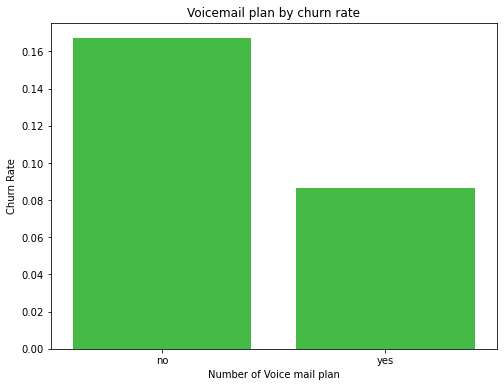

In [23]:
int_churn = df.groupby('Voice_mail_plan')['Churn'].mean().reset_index()

# Plotting using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(data=int_churn, x='Voice_mail_plan', y='Churn', color='limegreen')
plt.title('Voicemail plan by churn rate')
plt.xlabel('Number of Voice mail plan')
plt.ylabel('Churn Rate')
plt.show()

Some people with the voice mail plan end up leaving. May need some improving.

Multivariate analysis

Multivariate analysis involves exploring relationships and patterns between multiple variables in a dataset. This process helps uncover insights, correlations, and dependencies that can inform further analysis or modeling.

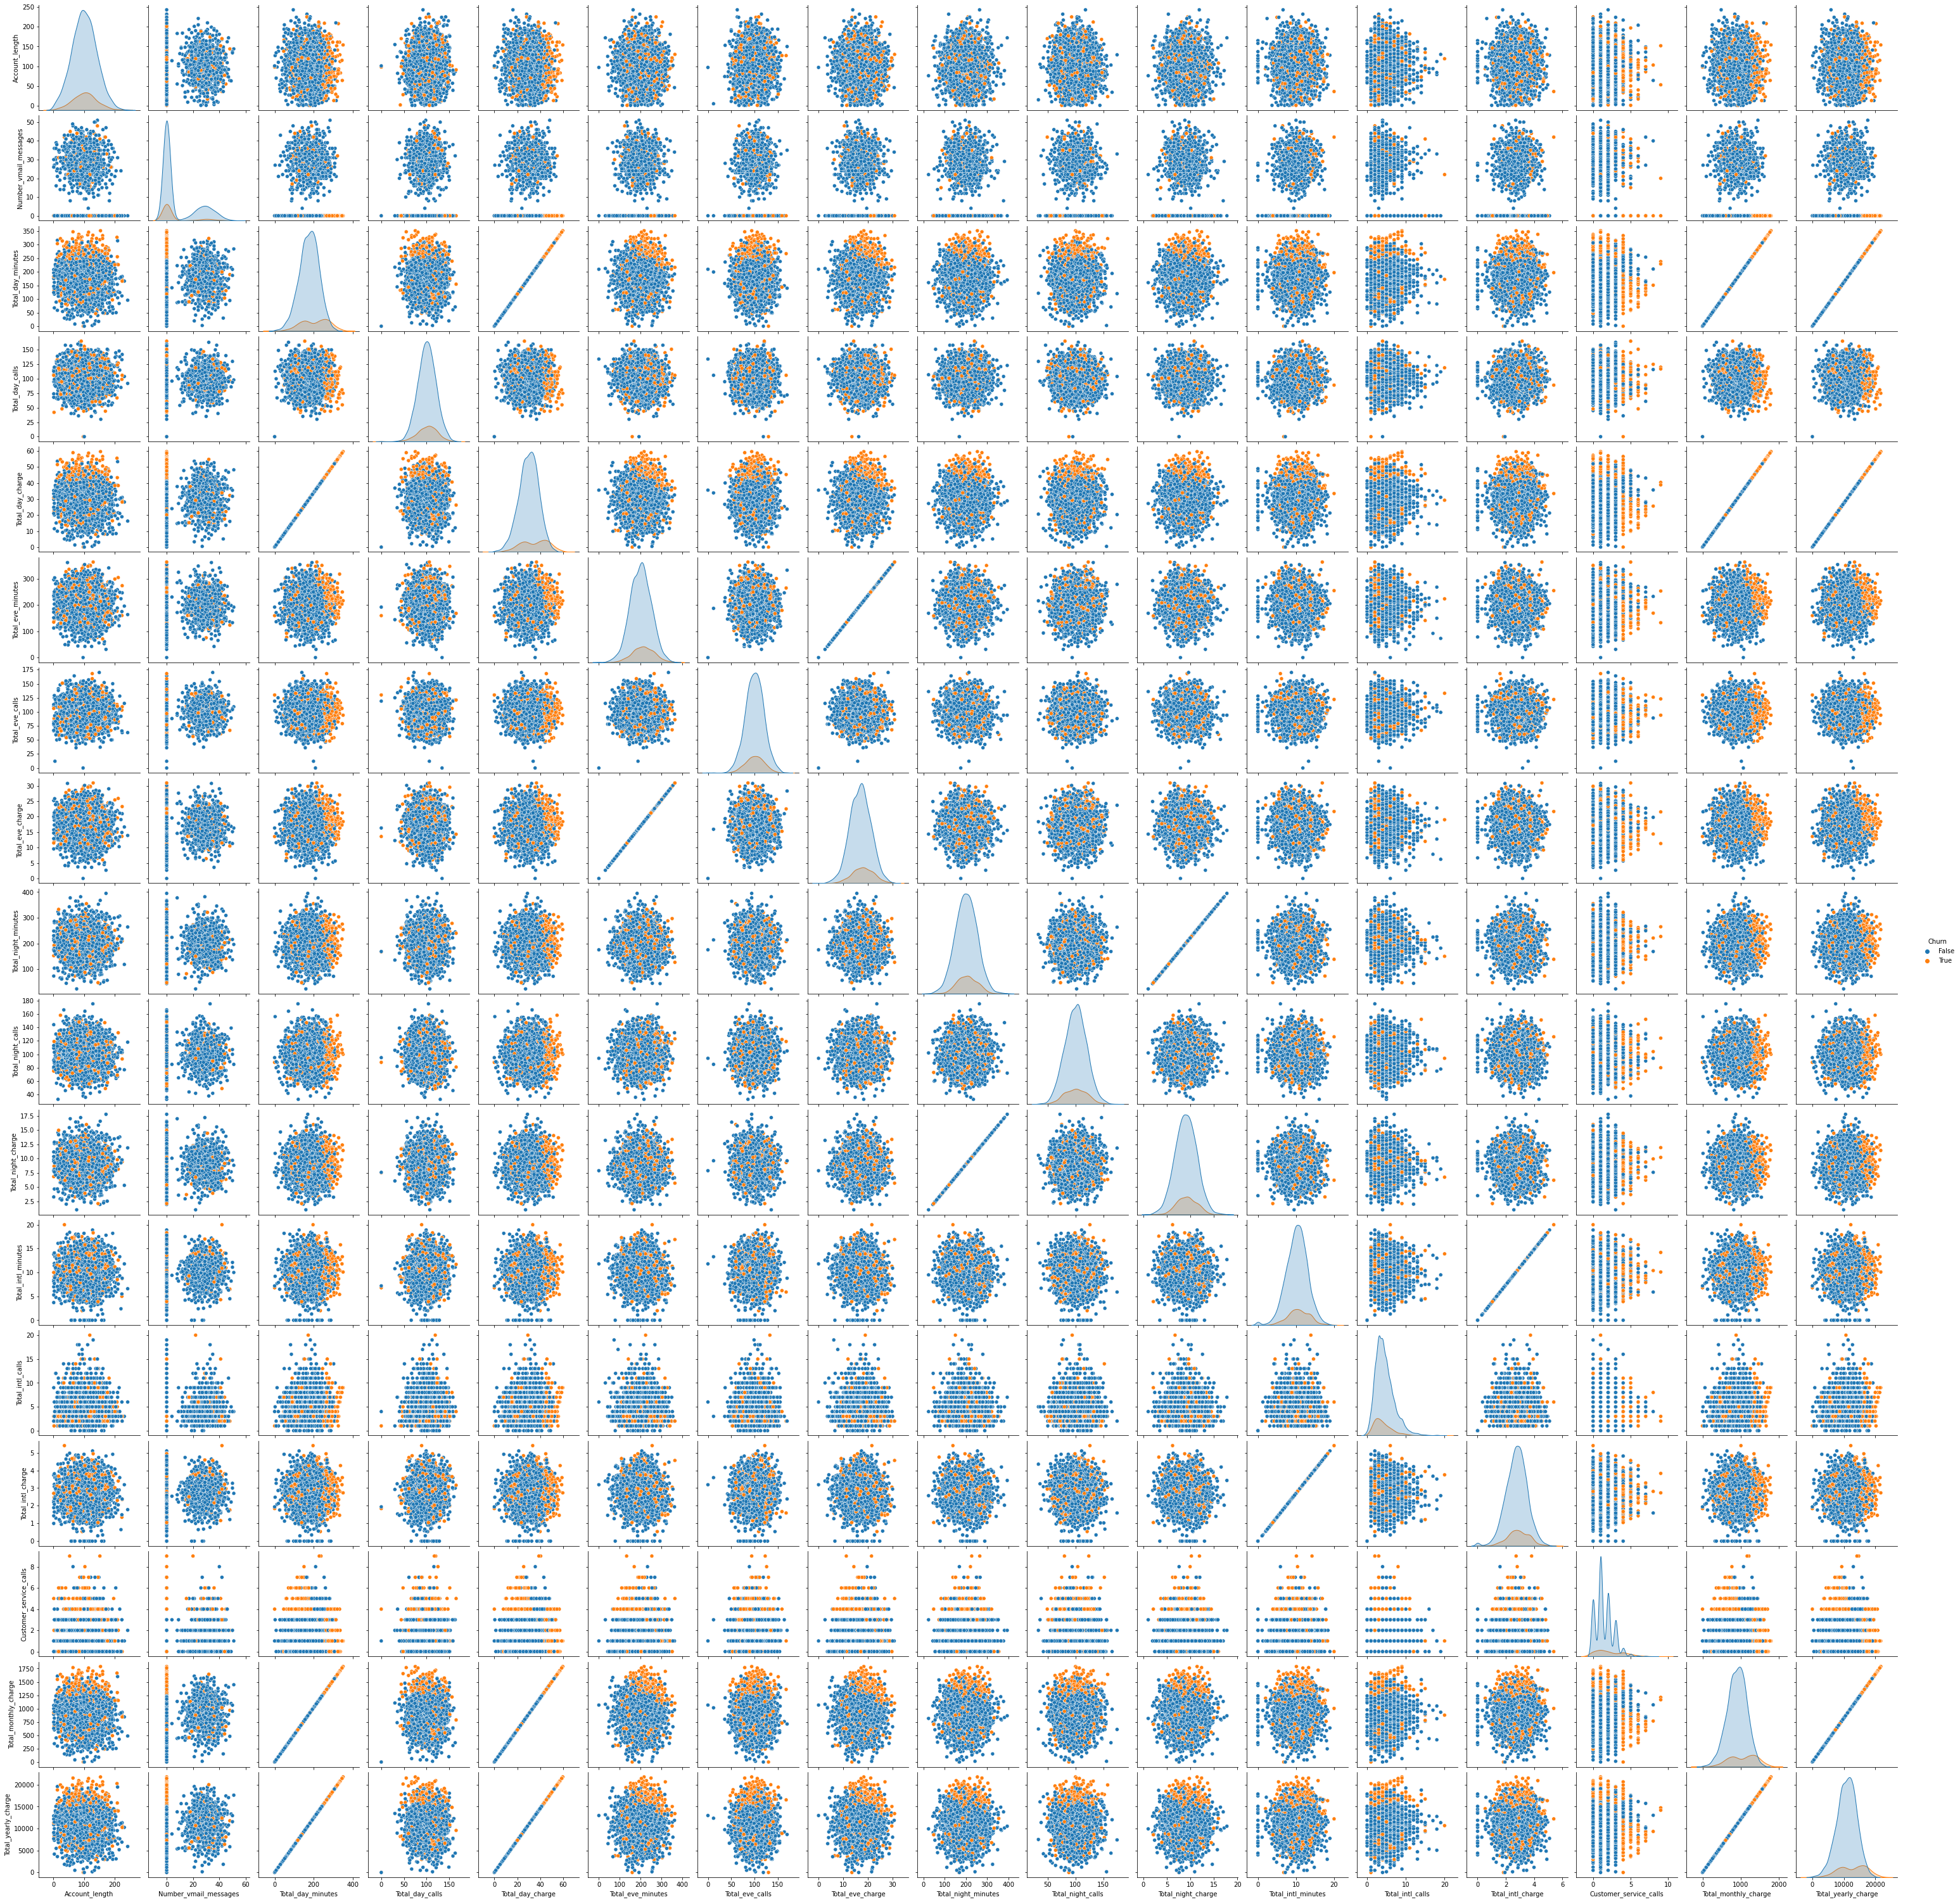

In [25]:
# Separate columns to be visualized based on unique value counts and data types
out_cols = list(set(df.nunique()[df.nunique() < 6].keys().tolist()
                   + df.select_dtypes(include='object').columns.tolist()))
viz_cols = [x for x in df.columns if x not in out_cols] + ['Churn']

# Create pairplot with KDE on diagonal for selected columns
sns.pairplot(df[viz_cols], diag_kind="kde", hue='Churn')
plt.show()

<strong> COLINEARITY AND MULTICOLINEARITY

Checking for collinearity between dependent and independent variables

In [27]:
df.corr = df.corr()['Churn'].map(abs).sort_values(ascending = False)
df.corr

Churn                     1.000000
Customer_service_calls    0.208750
Total_day_minutes         0.205151
Total_yearly_charge       0.205151
Total_day_charge          0.205151
Total_monthly_charge      0.205151
Total_eve_minutes         0.092796
Total_eve_charge          0.092786
Number_vmail_messages     0.089728
Total_intl_charge         0.068259
Total_intl_minutes        0.068239
Total_intl_calls          0.052844
Total_night_charge        0.035496
Total_night_minutes       0.035493
Total_day_calls           0.018459
Account_length            0.016541
Total_eve_calls           0.009233
Total_night_calls         0.006141
Name: Churn, dtype: float64

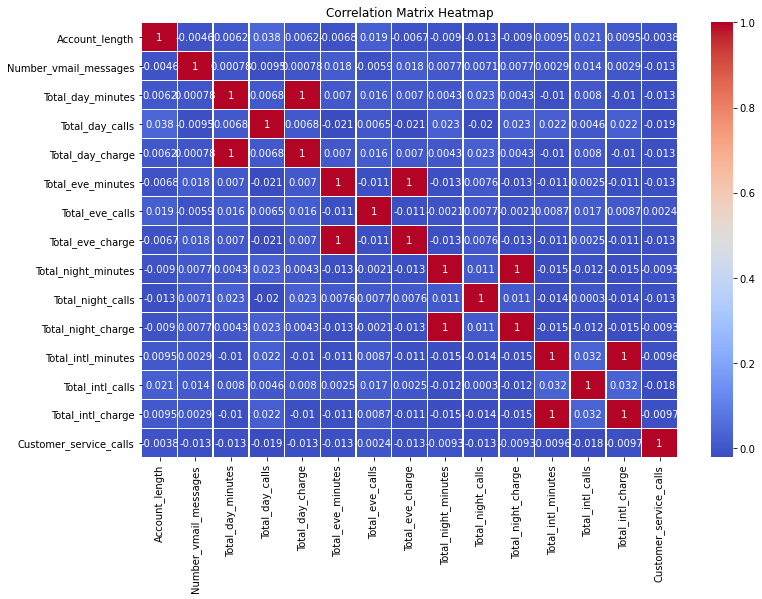

In [28]:
# Select the independent variables
independent_vars = df[['Account_length', 'Number_vmail_messages', 'Total_day_minutes', 'Total_day_calls', 'Total_day_charge',
                       'Total_eve_minutes', 'Total_eve_calls', 'Total_eve_charge', 'Total_night_minutes', 'Total_night_calls',
                       'Total_night_charge', 'Total_intl_minutes', 'Total_intl_calls', 'Total_intl_charge', 'Customer_service_calls']]

# Calculate the correlation matrix
corr_matrix = independent_vars.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))  # Set the figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


From the analysis, Customer service calls has the correlation with Churn

In [26]:
df.shape

(3333, 20)

Checking for Multicollinearity

Multicolinearity - when two or more independent variables strongly correlate to one another.

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[['Account_length', 'Number_vmail_messages', 'Total_day_minutes', 'Total_day_calls', 'Total_day_charge',
        'Total_eve_minutes', 'Total_eve_calls', 'Total_eve_charge', 'Total_night_minutes', 'Total_night_calls',
        'Total_night_charge', 'Total_intl_minutes', 'Total_intl_calls', 'Total_intl_charge', 'Customer_service_calls']]
# Calculate the correlation matrix
corr_matrix = X.corr()
print(corr_matrix)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)


                        Account_length  Number_vmail_messages  \
Account_length                1.000000              -0.004628   
Number_vmail_messages        -0.004628               1.000000   
Total_day_minutes             0.006216               0.000778   
Total_day_calls               0.038470              -0.009548   
Total_day_charge              0.006214               0.000776   
Total_eve_minutes            -0.006757               0.017562   
Total_eve_calls               0.019260              -0.005864   
Total_eve_charge             -0.006745               0.017578   
Total_night_minutes          -0.008955               0.007681   
Total_night_calls            -0.013176               0.007123   
Total_night_charge           -0.008960               0.007663   
Total_intl_minutes            0.009514               0.002856   
Total_intl_calls              0.020661               0.013957   
Total_intl_charge             0.009546               0.002884   
Customer_service_calls   

High correlation,(e.g above 0.7)indicates multicollinearity.
 If the VIF is greater than 5 or 10, it indicates multicolinearity. Higher VIF signify stronger correlation with other predictors.

In [28]:
# Calculate correlation matrix
corr_matrix = X.corr().abs()
# Create a mask for selecting upper triangle of correlation matrix
upper_triangle_mask = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),
k=1).astype(bool))
# Find features with correlation above threshold
highly_correlated_features = [column for column in upper_triangle_mask.columns if any(upper_triangle_mask[column] > 0.8)]
# Drop highly correlated features
selected_features = df.drop(highly_correlated_features, axis=1)
selected_features

Account_length International_plan Voice_mail_plan  \
0                128                 no             yes   
1                107                 no             yes   
2                137                 no              no   
3                 84                yes              no   
4                 75                yes              no   
...              ...                ...             ...   
3328             192                 no             yes   
3329              68                 no              no   
3330              28                 no              no   
3331             184                yes              no   
3332              74                 no             yes   

      Number_vmail_messages  Total_day_minutes  Total_day_calls  \
0                        25              265.1              110   
1                        26              161.6              123   
2                         0              243.4              114   
3                         0              299.4               71   
4                         0              166.7              113   
...                     ...                ...              ...   
3328                     36              156.2               77   
3329                      0              231.1               57   
3330                      0              180.8              109   
3331                      0              213.8              105   
3332                     25              234.4              113   

      Total_eve_minutes  Total_eve_calls  Total_night_minutes  \
0                 197.4               99                244.7   
1                 195.5              103                254.4   
2                 121.2              110                162.6   
3                  61.9               88                196.9   
4                 148.3              122                186.9   
...                 ...              ...                  ...   
3328              215.5              126                279.1   
3329              153.4               55                191.3   
3330              288.8               58                191.9   
3331              159.6               84                139.2   
3332              265.9               82                241.4   

      Total_night_calls  Total_intl_minutes  Total_intl_calls  \
0                    91                10.0                 3   
1                   103                13.7                 3   
2                   104                12.2                 5   
3                    89                 6.6                 7   
4                   121                10.1                 3   
...                 ...                 ...               ...   
3328                 83                 9.9                 6   
3329                123                 9.6                 4   
3330                 91                14.1                 6   
3331                137                 5.0                10   
3332                 77                13.7                 4   

      Customer_service_calls  Churn  Total_monthly_charge  Total_yearly_charge  
0                          1  False                1352.1             16450.55  
1                          1  False                 824.1             10026.55  
2                          0  False                1241.4             15103.70  
3                          2  False                1527.0             18578.50  
4                          3  False                 850.2             10344.10  
...                      ...    ...                   ...                  ...  
3328                       2  False                 796.5              9690.75  
3329                       3  False                1178.7             14340.85  
3330                       2  False                 922.2             11220.10  
3331                       2  False                1090.5             13267.75  
3332                       0  False    

In [29]:
data_2 = selected_features
data_2.shape

(3333, 16)

Some of the columns were dropped due to multicolinearity

<strong> DATA PREPROCESSING

In [31]:
#1) split the data
from sklearn.model_selection import train_test_split

X = data_2.drop('Churn', axis=1)
y = data_2['Churn']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
#2) Scale and transform your categorical variables to binary.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train['International_plan'] = X_train['International_plan'].apply(lambda x: 1 if x== 'yes' else 0)
X_train['Voice_mail_plan'] = data_2['Voice_mail_plan'].apply(lambda x: 1 if x == 'yes' else 0)
X_train_scaled = scaler.fit_transform(X_train)
y_train = y_train.apply(lambda x: 1 if x else 0)

In [33]:
X_test['International_plan'] = X_test['International_plan'].apply(lambda x: 1 if x== 'yes' else 0)
X_test['Voice_mail_plan'] = X_test['Voice_mail_plan'].apply(lambda x: 1 if x == 'yes' else 0)
X_test_scaled = scaler.transform(X_test)
y_test = y_test.apply(lambda x: 1 if x else 0)


<strong> LOGISTIC REGRESSION

In [34]:
# 3. Fit the model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [35]:
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

precision_train = precision_score(y_train, y_pred_train)
precision_test = precision_score(y_test, y_pred_test)

recall_train = recall_score(y_train, y_pred_train)
recall_test = recall_score(y_test, y_pred_test)

f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)


In [37]:
print("Training Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)

print("Training Precision:", precision_train)
print("Test Precision:", precision_test)

print("Training Recall:", recall_train)
print("Test Recall:", recall_test)

print("Training F1 Score:", f1_train)
print("Test F1 Score:", f1_test)

Training Accuracy: 0.8630907726931732
Test Accuracy: 0.8545727136431784
Training Precision: 0.5611510791366906
Test Precision: 0.5666666666666667
Training Recall: 0.20418848167539266
Test Recall: 0.16831683168316833
Training F1 Score: 0.2994241842610365
Test F1 Score: 0.2595419847328244


<strong> GRADIENT BOOSTING CLASSIFIER

In [41]:
from sklearn.ensemble import GradientBoostingClassifier

# Train a Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_train_gb = gb_model.predict(X_train_scaled)
y_pred_test_gb = gb_model.predict(X_test_scaled)

# Evaluate the model
accuracy_train_gb = accuracy_score(y_train, y_pred_train_gb)
accuracy_test_gb = accuracy_score(y_test, y_pred_test_gb)

precision_train_gb = precision_score(y_train, y_pred_train_gb)
precision_test_gb = precision_score(y_test, y_pred_test_gb)

recall_train_gb = recall_score(y_train, y_pred_train_gb)
recall_test_gb = recall_score(y_test, y_pred_test_gb)

f1_train_gb = f1_score(y_train, y_pred_train_gb)
f1_test_gb = f1_score(y_test, y_pred_test_gb)

# Print the evaluation metrics
print("Gradient Boosting - Training Accuracy:", accuracy_train_gb)
print("Gradient Boosting - Test Accuracy:", accuracy_test_gb)

print("Gradient Boosting - Training Precision:", precision_train_gb)
print("Gradient Boosting - Test Precision:", precision_test_gb)

print("Gradient Boosting - Training Recall:", recall_train_gb)
print("Gradient Boosting - Test Recall:", recall_test_gb)

print("Gradient Boosting - Training F1 Score:", f1_train_gb)
print("Gradient Boosting - Test F1 Score:", f1_test_gb)


Gradient Boosting - Training Accuracy: 0.9726181545386346
Gradient Boosting - Test Accuracy: 0.9505247376311844
Gradient Boosting - Training Precision: 0.9873817034700315
Gradient Boosting - Test Precision: 0.9358974358974359
Gradient Boosting - Training Recall: 0.819371727748691
Gradient Boosting - Test Recall: 0.7227722772277227
Gradient Boosting - Training F1 Score: 0.8955650929899857
Gradient Boosting - Test F1 Score: 0.8156424581005586


<strong> SUPPORT VECTOR CLASSIFIER

In [42]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train an SVC model
svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_train_svc = svc_model.predict(X_train_scaled)
y_pred_test_svc = svc_model.predict(X_test_scaled)

# Evaluate the model
accuracy_train_svc = accuracy_score(y_train, y_pred_train_svc)
accuracy_test_svc = accuracy_score(y_test, y_pred_test_svc)

precision_train_svc = precision_score(y_train, y_pred_train_svc)
precision_test_svc = precision_score(y_test, y_pred_test_svc)

recall_train_svc = recall_score(y_train, y_pred_train_svc)
recall_test_svc = recall_score(y_test, y_pred_test_svc)

f1_train_svc = f1_score(y_train, y_pred_train_svc)
f1_test_svc = f1_score(y_test, y_pred_test_svc)

# Print the evaluation metrics
print("SVC - Training Accuracy:", accuracy_train_svc)
print("SVC - Test Accuracy:", accuracy_test_svc)

print("SVC - Training Precision:", precision_train_svc)
print("SVC - Test Precision:", precision_test_svc)

print("SVC - Training Recall:", recall_train_svc)
print("SVC - Test Recall:", recall_test_svc)

print("SVC - Training F1 Score:", f1_train_svc)
print("SVC - Test F1 Score:", f1_test_svc)


SVC - Training Accuracy: 0.9486121530382595
SVC - Test Accuracy: 0.9295352323838081
SVC - Training Precision: 0.9693486590038314
SVC - Test Precision: 0.921875
SVC - Training Recall: 0.662303664921466
SVC - Test Recall: 0.5841584158415841
SVC - Training F1 Score: 0.7869362363919129
SVC - Test F1 Score: 0.7151515151515151


<strong> K NEIGHBORS CLASSIFIER

In [43]:
from sklearn.neighbors import KNeighborsClassifier

# Train a KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_train_knn = knn_model.predict(X_train_scaled)
y_pred_test_knn = knn_model.predict(X_test_scaled)

# Evaluate the model
accuracy_train_knn = accuracy_score(y_train, y_pred_train_knn)
accuracy_test_knn = accuracy_score(y_test, y_pred_test_knn)

precision_train_knn = precision_score(y_train, y_pred_train_knn)
precision_test_knn = precision_score(y_test, y_pred_test_knn)

recall_train_knn = recall_score(y_train, y_pred_train_knn)
recall_test_knn = recall_score(y_test, y_pred_test_knn)

f1_train_knn = f1_score(y_train, y_pred_train_knn)
f1_test_knn = f1_score(y_test, y_pred_test_knn)

# Print the evaluation metrics
print("KNN - Training Accuracy:", accuracy_train_knn)
print("KNN - Test Accuracy:", accuracy_test_knn)

print("KNN - Training Precision:", precision_train_knn)
print("KNN - Test Precision:", precision_test_knn)

print("KNN - Training Recall:", recall_train_knn)
print("KNN - Test Recall:", recall_test_knn)

print("KNN - Training F1 Score:", f1_train_knn)
print("KNN - Test F1 Score:", f1_test_knn)


KNN - Training Accuracy: 0.9261065266316579
KNN - Test Accuracy: 0.9085457271364318
KNN - Training Precision: 0.9111111111111111
KNN - Test Precision: 0.8703703703703703
KNN - Training Recall: 0.5366492146596858
KNN - Test Recall: 0.46534653465346537
KNN - Training F1 Score: 0.6754530477759473
KNN - Test F1 Score: 0.6064516129032258


<strong>XGBClassifier

In [44]:
from xgboost import XGBClassifier

# Train an XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_train_xgb = xgb_model.predict(X_train_scaled)
y_pred_test_xgb = xgb_model.predict(X_test_scaled)

# Evaluate the model
accuracy_train_xgb = accuracy_score(y_train, y_pred_train_xgb)
accuracy_test_xgb = accuracy_score(y_test, y_pred_test_xgb)

precision_train_xgb = precision_score(y_train, y_pred_train_xgb)
precision_test_xgb = precision_score(y_test, y_pred_test_xgb)

recall_train_xgb = recall_score(y_train, y_pred_train_xgb)
recall_test_xgb = recall_score(y_test, y_pred_test_xgb)

f1_train_xgb = f1_score(y_train, y_pred_train_xgb)
f1_test_xgb = f1_score(y_test, y_pred_test_xgb)

# Print the evaluation metrics
print("XGBoost - Training Accuracy:", accuracy_train_xgb)
print("XGBoost - Test Accuracy:", accuracy_test_xgb)

print("XGBoost - Training Precision:", precision_train_xgb)
print("XGBoost - Test Precision:", precision_test_xgb)

print("XGBoost - Training Recall:", recall_train_xgb)
print("XGBoost - Test Recall:", recall_test_xgb)

print("XGBoost - Training F1 Score:", f1_train_xgb)
print("XGBoost - Test F1 Score:", f1_test_xgb)


XGBoost - Training Accuracy: 1.0
XGBoost - Test Accuracy: 0.9565217391304348
XGBoost - Training Precision: 1.0
XGBoost - Test Precision: 0.9285714285714286
XGBoost - Training Recall: 1.0
XGBoost - Test Recall: 0.7722772277227723
XGBoost - Training F1 Score: 1.0
XGBoost - Test F1 Score: 0.8432432432432432


<strong>RANDOM FOREST CLASSIFIER

In [45]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_train_rf = rf_model.predict(X_train_scaled)
y_pred_test_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
accuracy_train_rf = accuracy_score(y_train, y_pred_train_rf)
accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)

precision_train_rf = precision_score(y_train, y_pred_train_rf)
precision_test_rf = precision_score(y_test, y_pred_test_rf)

recall_train_rf = recall_score(y_train, y_pred_train_rf)
recall_test_rf = recall_score(y_test, y_pred_test_rf)

f1_train_rf = f1_score(y_train, y_pred_train_rf)
f1_test_rf = f1_score(y_test, y_pred_test_rf)

# Print the evaluation metrics
print("Random Forest - Training Accuracy:", accuracy_train_rf)
print("Random Forest - Test Accuracy:", accuracy_test_rf)

print("Random Forest - Training Precision:", precision_train_rf)
print("Random Forest - Test Precision:", precision_test_rf)

print("Random Forest - Training Recall:", recall_train_rf)
print("Random Forest - Test Recall:", recall_test_rf)

print("Random Forest - Training F1 Score:", f1_train_rf)
print("Random Forest - Test F1 Score:", f1_test_rf)


Random Forest - Training Accuracy: 1.0
Random Forest - Test Accuracy: 0.9415292353823088
Random Forest - Training Precision: 1.0
Random Forest - Test Precision: 0.8875
Random Forest - Training Recall: 1.0
Random Forest - Test Recall: 0.7029702970297029
Random Forest - Training F1 Score: 1.0
Random Forest - Test F1 Score: 0.7845303867403315


<strong> HYPERPARAMETER TUNING

<strong> 1. LOGISTIC REGRESSION

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the grid of hyperparameters to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=LogisticRegression(max_iter=1000, random_state=42), param_grid=param_grid, cv=3, scoring='accuracy')

# Perform the grid search
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_test_best_2 = best_model.predict(X_test_scaled)

# Evaluate the best model
accuracy_test_best = accuracy_score(y_test, y_pred_test_best_2)
print("Test Accuracy with Best Model:", accuracy_test_best)


Best Hyperparameters: {'C': 0.01, 'penalty': 'l2'}
Test Accuracy with Best Model: 0.856071964017991


<strong> 2. KNN CLASSIFIER 

In [55]:
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters to search
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv=3, scoring='accuracy')

# Perform the grid search
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_test_best_1 = best_model.predict(X_test_scaled)

# Evaluate the best model
accuracy_test_best = accuracy_score(y_test, y_pred_test_best_1)
print("Test Accuracy with Best Model:", accuracy_test_best)


Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Test Accuracy with Best Model: 0.9100449775112444


<strong> 3. GRADIENT BOOSTING CLASSIFIER

In [60]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 5, 7]
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42), param_grid=param_grid, cv=3, scoring='accuracy')

# Perform the grid search
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_test_best_3 = best_model.predict(X_test_scaled)

# Evaluate the best model
accuracy_test_best = accuracy_score(y_test, y_pred_test_best_3)
print("Test Accuracy with Best Model:", accuracy_test_best)


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}
Test Accuracy with Best Model: 0.952023988005997


<strong>4. SUPPORT VECTOR CLASSIFIER

In [61]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the grid of hyperparameters to search
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=SVC(random_state=42), param_grid=param_grid, cv=3, scoring='accuracy')

# Perform the grid search
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_test_best_4 = best_model.predict(X_test_scaled)

# Evaluate the best model
accuracy_test_best = accuracy_score(y_test, y_pred_test_best_4)
print("Test Accuracy with Best Model:", accuracy_test_best)


Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Test Accuracy with Best Model: 0.9355322338830585


<strong>5. XGBClassifier

In [62]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=XGBClassifier(random_state=42), param_grid=param_grid, cv=3, scoring='accuracy')

# Perform the grid search
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_test_best_5 = best_model.predict(X_test_scaled)

# Evaluate the best model
accuracy_test_best = accuracy_score(y_test, y_pred_test_best_5)
print("Test Accuracy with Best Model:", accuracy_test_best)


Best Hyperparameters: {'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150, 'subsample': 1.0}
Test Accuracy with Best Model: 0.9610194902548725


<strong> ROC CURVE

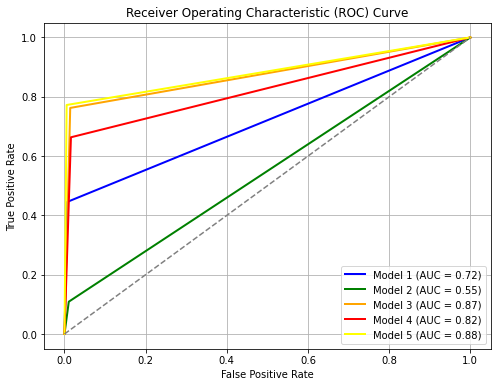

In [63]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate ROC curve and AUC for each model
fpr1, tpr1, _ = roc_curve(y_test, y_pred_test_best_1)  # Replace y_pred1 with your model's predicted probabilities
auc1 = roc_auc_score(y_test, y_pred_test_best_1)

fpr2, tpr2, _ = roc_curve(y_test,y_pred_test_best_2)  # Replace y_pred2 with your model's predicted probabilities
auc2 = roc_auc_score(y_test, y_pred_test_best_2)

fpr3, tpr3, _ = roc_curve(y_test,y_pred_test_best_3)  # Replace y_pred2 with your model's predicted probabilities
auc3 = roc_auc_score(y_test, y_pred_test_best_3)

fpr4, tpr4, _ = roc_curve(y_test,y_pred_test_best_4)  # Replace y_pred2 with your model's predicted probabilities
auc4 = roc_auc_score(y_test, y_pred_test_best_4)

fpr5, tpr5, _ = roc_curve(y_test,y_pred_test_best_5)  # Replace y_pred2 with your model's predicted probabilities
auc5 = roc_auc_score(y_test, y_pred_test_best_5)

# Add more models as needed

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, color='blue', lw=2, label=f'Model 1 (AUC = {auc1:.2f})')
plt.plot(fpr2, tpr2, color='green', lw=2, label=f'Model 2 (AUC = {auc2:.2f})')
plt.plot(fpr3, tpr3, color='orange', lw=2, label=f'Model 3 (AUC = {auc3:.2f})')
plt.plot(fpr4, tpr4, color='red', lw=2, label=f'Model 4 (AUC = {auc4:.2f})')
plt.plot(fpr5, tpr5, color='yellow', lw=2, label=f'Model 5 (AUC = {auc5:.2f})')
# Add more plots for additional models

# Plot the random guess line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


The last model XGB Classifier has the highest AUC score(0.88), it has the best ability to distinguish between positive and negative classes among the models listed. It performs exceptionally well and can be considered the strongest model.

<strong> FEATURE IMPORTANCE

<Figure size 720x576 with 0 Axes>

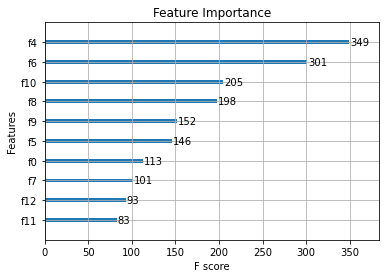

Feature Importance:
Voice_mail_plan: 0.2103
International_plan: 0.1555
Total_night_charge: 0.1500
Total_night_calls: 0.0980
Total_day_minutes: 0.0922
Total_night_minutes: 0.0602
Total_day_charge: 0.0597
Number_vmail_messages: 0.0400
Total_eve_calls: 0.0373
Total_eve_charge: 0.0272
Total_day_calls: 0.0247
Total_eve_minutes: 0.0243
Account_length: 0.0207
Total_intl_minutes: 0.0000
Total_intl_calls: 0.0000


In [68]:
from xgboost import XGBClassifier, plot_importance
import matplotlib.pyplot as plt

# Assuming xgb_model is your trained XGBClassifier model
# Example:
# xgb_model = XGBClassifier(...)
# xgb_model.fit(X_train_scaled, y_train)

# Feature names based on your provided DataFrame
feature_names = ['Account_length', 'International_plan', 'Voice_mail_plan',
                 'Number_vmail_messages', 'Total_day_minutes', 'Total_day_calls',
                 'Total_day_charge', 'Total_eve_minutes', 'Total_eve_calls',
                 'Total_eve_charge', 'Total_night_minutes', 'Total_night_calls',
                 'Total_night_charge', 'Total_intl_minutes', 'Total_intl_calls',
                 'Total_intl_charge', 'Customer_service_calls', 'Total_monthly_charge', 
                 'Total_yearly_charge']

# Plot feature importance
plt.figure(figsize=(10, 8))
plot_importance(xgb_model, max_num_features=10, importance_type='weight')  # Plot the top 10 most important features
plt.title('Feature Importance')
plt.show()

# Get feature importance scores
importance_scores = xgb_model.feature_importances_

# Create a list of tuples with feature names and their importance scores
feature_importance = sorted(zip(feature_names, importance_scores), key=lambda x: x[1], reverse=True)

print("Feature Importance:")
for feature, score in feature_importance:
    print(f"{feature}: {score:.4f}")


i) **What Key factors lead to customer churn?**.<br>Voice mail plan and International plan had the highest importance, suggesting that these two features have the highest influence in predicting churn. Total international minutes and total international calls have no importance indicating that they do not contribute to the models ability to predict churn.

RECCOMENDATIONS.


1) The company should look into the voice mail plan and international plan packages, make sure that the people who use these services are well taken care of as they have the highest rate of churn.

2) The company could try to either lower its charges per minute for clients, which have many call minutes or it could offer flat rates for calls

3) The company should look for an awarding system or give special offers to their longest serving customers to up their spirits